<a href="https://colab.research.google.com/github/aanchal0431/chatbot/blob/main/ContinousBagOfWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatbot

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [ ]:
print(tf.__version__)

2.7.0


Git Commands to clone repository, pull and push data

In [ ]:
#!git clone https://github.com/aanchal0431/chatbot.git
#!git pull
#%cd chatbot/
#!git config --global user.name "BhavanaGITHUB"
#!git config --global user.email "kbhavana710@gmail.com"
#!git remote
#!git --help
#!git remote -v
#!git init
#%ls
!git add *
!git status 
#!git commit -m 'New Commit'

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


### Data Preprocessing

*   Load datasets
*   Append question and answer datasets
*   Remove duplicate questions
*   Convert data to lower case
*   Split into train and test
*   Drop irrelvant columns






In [ ]:
cur_path = 'Data/Question_Answer_Dataset_v1.2/'
data_s8 = pd.read_csv(cur_path + 'S08/question_answer_pairs.txt', delimiter="\t")
data_s9 = pd.read_csv(cur_path + 'S09/question_answer_pairs.txt', delimiter="\t")
data_s10 = pd.read_csv(cur_path + 'S10/question_answer_pairs.txt', delimiter="\t")
print("Shape s8:", data_s8.shape)
print("Shape s9:", data_s9.shape)
print("Shape s10:", data_s10.shape)
data_s8.head()

Shape s8: (1715, 6)
Shape s9: (825, 6)
Shape s10: (1458, 6)


,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,data/set3/a4
1,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,Yes.,easy,easy,data/set3/a4
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,easy,medium,data/set3/a4
3,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,Yes.,easy,easy,data/set3/a4
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,easy,medium,data/set3/a4


In [ ]:
#append all questions into one data set
data_all = data_s8.append(data_s9.append(data_s10))
#data_all = data_s8.append(data_s9)
print("Shape:", data_all.shape)
data_all.head()


Shape: (3998, 6)


,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,data/set3/a4
1,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,Yes.,easy,easy,data/set3/a4
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,easy,medium,data/set3/a4
3,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,Yes.,easy,easy,data/set3/a4
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,easy,medium,data/set3/a4


In [ ]:
#remove duplicate questions
data_all = data_all.drop_duplicates(subset=['Question'])
print("Shape:", data_all.shape)
data_all.head()



Shape: (2457, 6)


,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,data/set3/a4
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,easy,medium,data/set3/a4
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,easy,medium,data/set3/a4
6,Abraham_Lincoln,How many long was Lincoln's formal education?,18 months,medium,easy,data/set3/a4
8,Abraham_Lincoln,When did Lincoln begin his political career?,1832,medium,easy,data/set3/a4


In [ ]:
# convert text to lower case
data_all = data_all.apply(lambda x: x.astype(str).str.lower())
data_all.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,abraham_lincoln,was abraham lincoln the sixteenth president of...,yes,easy,easy,data/set3/a4
2,abraham_lincoln,did lincoln sign the national banking act of 1...,yes,easy,medium,data/set3/a4
4,abraham_lincoln,did his mother die of pneumonia?,no,easy,medium,data/set3/a4
6,abraham_lincoln,how many long was lincoln's formal education?,18 months,medium,easy,data/set3/a4
8,abraham_lincoln,when did lincoln begin his political career?,1832,medium,easy,data/set3/a4


In [ ]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence
# import APIs
from tensorflow.keras.preprocessing.sequence import pad_sequences

# segregating questions and answers into different lists
questions = list(data_all['Question'])
answers = list(data_all['Answer'])

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(questions)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in questions]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 4603
Vocabulary Sample: [('the', 1), ('of', 2), ('is', 3), ('what', 4), ('in', 5), ('a', 6), ('was', 7), ('did', 8), ('to', 9), ('are', 10)]


In [ ]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['was', 'abraham', 'the', 'sixteenth'] -> Target (Y): lincoln
Context (X): ['abraham', 'lincoln', 'sixteenth', 'president'] -> Target (Y): the
Context (X): ['lincoln', 'the', 'president', 'of'] -> Target (Y): sixteenth
Context (X): ['the', 'sixteenth', 'of', 'the'] -> Target (Y): president
Context (X): ['sixteenth', 'president', 'the', 'united'] -> Target (Y): of
Context (X): ['president', 'of', 'united', 'states'] -> Target (Y): the
Context (X): ['did', 'lincoln', 'the', 'national'] -> Target (Y): sign
Context (X): ['lincoln', 'sign', 'national', 'banking'] -> Target (Y): the
Context (X): ['sign', 'the', 'banking', 'act'] -> Target (Y): national
Context (X): ['the', 'national', 'act', 'of'] -> Target (Y): banking
Context (X): ['national', 'banking', 'of', '1863'] -> Target (Y): act


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            460300    
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4603)              464903    
                                                                 
Total params: 925,203
Trainable params: 925,203
Non-trainable params: 0
_________________________________________________________________
None


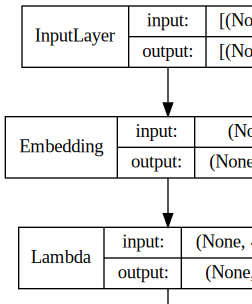

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 166306.81165263057

Epoch: 2 	Loss: 206073.5520290509

Epoch: 3 	Loss: 208887.3108097911

Epoch: 4 	Loss: 214387.803562155

Epoch: 5 	Loss: 222564.57755349018



In [ ]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(4602, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
of,0.051188,0.281065,-0.433838,-0.685896,-0.512123,-0.318222,0.786899,-0.196780,1.133767,0.528209,0.439144,0.869952,0.847217,-0.329331,0.235718,-0.325248,0.997392,0.324354,-0.470936,0.422481,-0.327393,-0.708525,-0.339381,0.618993,0.352388,-1.065636,1.518173,-0.203433,-0.981690,0.979669,-0.854129,-0.559715,0.305877,-1.185726,0.782353,0.530475,0.804923,-0.029656,-0.109610,-0.360088,...,-0.535786,0.263426,-0.354586,0.498613,-0.032345,0.702324,-0.619632,-0.697366,0.510462,-0.847246,0.596901,0.540835,-0.029212,-0.832919,-0.441352,-0.434334,0.449513,0.277234,0.664027,1.159902,-0.434913,0.953996,0.371176,-0.016685,-0.581671,-0.316784,1.554690,-0.489334,0.592900,-1.102865,-0.547660,-1.143840,0.891372,0.142314,1.007585,0.350665,0.585794,0.490907,-0.802997,-0.137600
is,0.006508,0.764449,0.031156,0.097405,-0.498227,-0.894063,0.537045,-0.600788,1.551241,0.886714,0.843648,0.356809,0.489454,-0.564068,0.860416,-0.390734,0.849598,0.916952,-0.721721,0.540273,-0.244766,-0.617669,-0.663751,0.968248,0.447682,-1.022745,1.459100,0.155554,-0.181132,0.681494,-0.787993,-0.422360,0.618193,-0.456692,0.535140,0.486209,1.458653,-0.187418,-0.948222,-0.148799,...,-0.329341,0.332216,-0.496371,1.178452,0.650934,0.720045,0.001005,-0.782357,-0.322030,-0.645616,0.723080,0.546756,-0.152348,-0.838207,-1.134783,-0.363280,-0.400093,1.148589,0.311560,0.902640,-0.550958,0.720375,0.941554,-0.606153,-0.434473,-1.113042,1.310127,-0.301397,0.507414,-0.412303,-0.980762,0.004575,0.101370,0.687648,0.990651,0.716696,0.215226,0.473335,-0.678311,-0.677203
what,0.186872,0.781459,-0.915151,0.140656,0.212332,-0.596404,0.383032,-0.665534,0.466645,0.614570,0.055593,0.661673,0.544096,0.028627,-0.151984,0.092694,0.607515,0.864798,-0.226238,0.302281,0.606794,-0.288672,-0.181953,0.089994,0.335233,-0.028032,0.937905,-0.580713,-0.487430,0.532218,-0.075916,-0.325587,0.275136,-0.715626,0.786060,-0.325840,0.865849,-0.471960,-0.917699,-0.382189,...,-0.151725,0.245422,-0.484560,0.240646,0.170568,-0.085851,-0.409139,0.034127,0.817385,-0.213474,0.811204,0.632425,-0.835844,0.024200,-0.874821,-0.099849,0.762119,0.787458,-0.075096,-0.016722,-0.436196,0.091252,0.453856,-0.206817,-1.284861,-0.260331,0.477700,-0.226045,0.565060,-0.301416,-0.701386,-0.511863,0.898666,0.374524,0.221552,0.277909,0.349032,0.573460,-0.519933,0.070590
in,0.549362,0.243955,-0.521894,-0.665858,-0.568497,-0.741218,0.125930,-0.703855,0.193666,-0.081292,-0.052843,0.430901,0.338356,-0.186337,0.141379,-0.067362,0.764535,0.264006,0.183715,0.266027,0.630542,-0.692337,-0.312048,0.113887,-0.082273,-0.694300,0.200138,0.490451,-0.717610,0.462035,-0.280312,-0.051815,0.046303,-0.036033,0.421674,0.500308,-0.773558,0.249021,-0.204052,-0.210397,...,-0.397152,0.708103,-0.344799,0.460207,0.251714,0.629953,-0.248717,-0.111233,-0.304358,-0.627346,0.268491,0.431515,0.214436,-0.524920,0.050922,-0.212790,0.529207,1.000898,-0.315040,0.689528,-0.114529,0.524489,0.647875,-0.096087,-0.017374,0.303450,0.637853,-0.551676,0.380500,0.136567,-0.370029,0.015920,-0.369010,0.316336,1.061747,0.148181,0.265526,0.412547,-0.249851,0.049340
a,0.163890,0.936497,-0.260315,-0.477041,-0.644102,-0.850460,0.668492,-0.194432,0.861604,0.591385,0.839366,0.253318,0.461645,-0.800343,0.903052,0.141669,0.752865,0.815359,-0.945503,0.676046,-0.227022,-1.049612,-0.436847,1.096221,0.244272,-1.330042,1.285822,-0.138728,-0.840352,0.618252,-0.939783,-0.097480,0.345813,-0.861304,0.586657,0.523009,1.342579,-0.601694,-0.581062,-0.309500,...,-0.628876,-0.005915,-0.761448,0.724995,0.552272,0.509551,-0.498648,-0.608532,-0.107888,-1.097705,0.913972,0.360097,-0.456831,-0.598986,-0.665863,-0.586760,0.384379,0.516820,0.270420,0.973324,-0.451891,0.475897,1.006258,-0.314060,-0.589137,-0.658075,0.764618,-0.458647,0.381080,-1.472084,-1.302472,-0.939486,-0.062880,0.693

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['national', 'banking', 'sixteenth', 'die', 'sign', 'united', 'president','president']}

similar_words

(4602, 4602)


{'banking': ['individuals', 'safari', '35', 'fragmented', 'determining'],
 'die': ['paper', 'political', 'across', 'make', 'vp'],
 'national': ['very', 'modern', 'main', 'study', 'system'],
 'president': ['john', "''", 'animals', 'elected', 'under'],
 'sign': ['construction',
  'predecessors',
  'experiment',
  'principles',
  'stopped'],
 'sixteenth': ['coastline',
  'illustrations',
  'thirtieth',
  'negative',
  'precursor'],
 'united': ['department', '1860', 'como', 'laws', 'election']}